In [9]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

*a priori* solution. The $P$ profile has strange artifacts and adaptive time-stepping doesn't work.

In [10]:
N = 64
p = 3
T = 1

configs = dict(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer,
        x,
        y,
        z,
        vx=1,
        bounds=(1e-6, 1),
        P=1e-6,
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (0, np.inf)},
    CFL=1 / 7,
    adaptive_timestepping=False,
    lazy_primitives=True,
    riemann_solver="llf",
)

solver1 = EulerSolver(
    flux_nodes="cfca",
    **configs,
)
solver1.ssprk3(T)

solver2 = EulerSolver(
    flux_nodes="pfpa",
    **configs,
)
solver2.ssprk3(T)

solver3 = EulerSolver(
    flux_nodes="pfcn",
    **configs,
)
solver3.ssprk3(T)

100%|██████████| 1.0/1 [00:04]                  
100%|██████████| 1.0/1 [00:04]                  
100%|██████████| 1.0/1 [00:04]                  


Text(0, 0.5, 'dt')

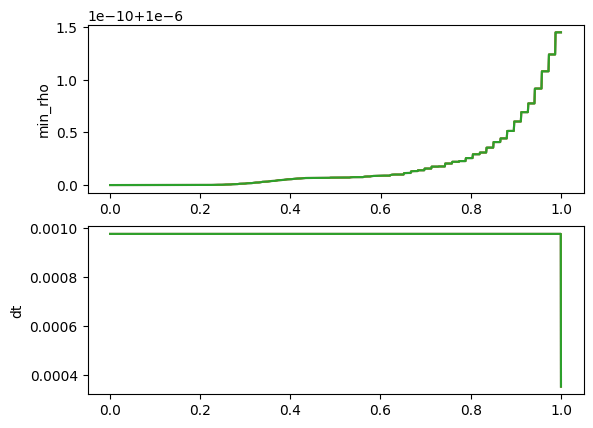

In [11]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(
    solver1.minisnapshots["t"],
    np.array(solver1.minisnapshots["min_rho"]),
)
axs[0].plot(
    solver2.minisnapshots["t"],
    np.array(solver2.minisnapshots["min_rho"]),
)
axs[0].plot(
    solver3.minisnapshots["t"],
    np.array(solver3.minisnapshots["min_rho"]),
)
axs[0].set_ylabel("min_rho")
axs[1].plot(solver1.minisnapshots["t"], solver1.minisnapshots["dt"])
axs[1].plot(solver2.minisnapshots["t"], solver2.minisnapshots["dt"])
axs[1].plot(solver3.minisnapshots["t"], solver3.minisnapshots["dt"])
axs[1].set_ylabel("dt")

Text(0, 0.5, '$P$')

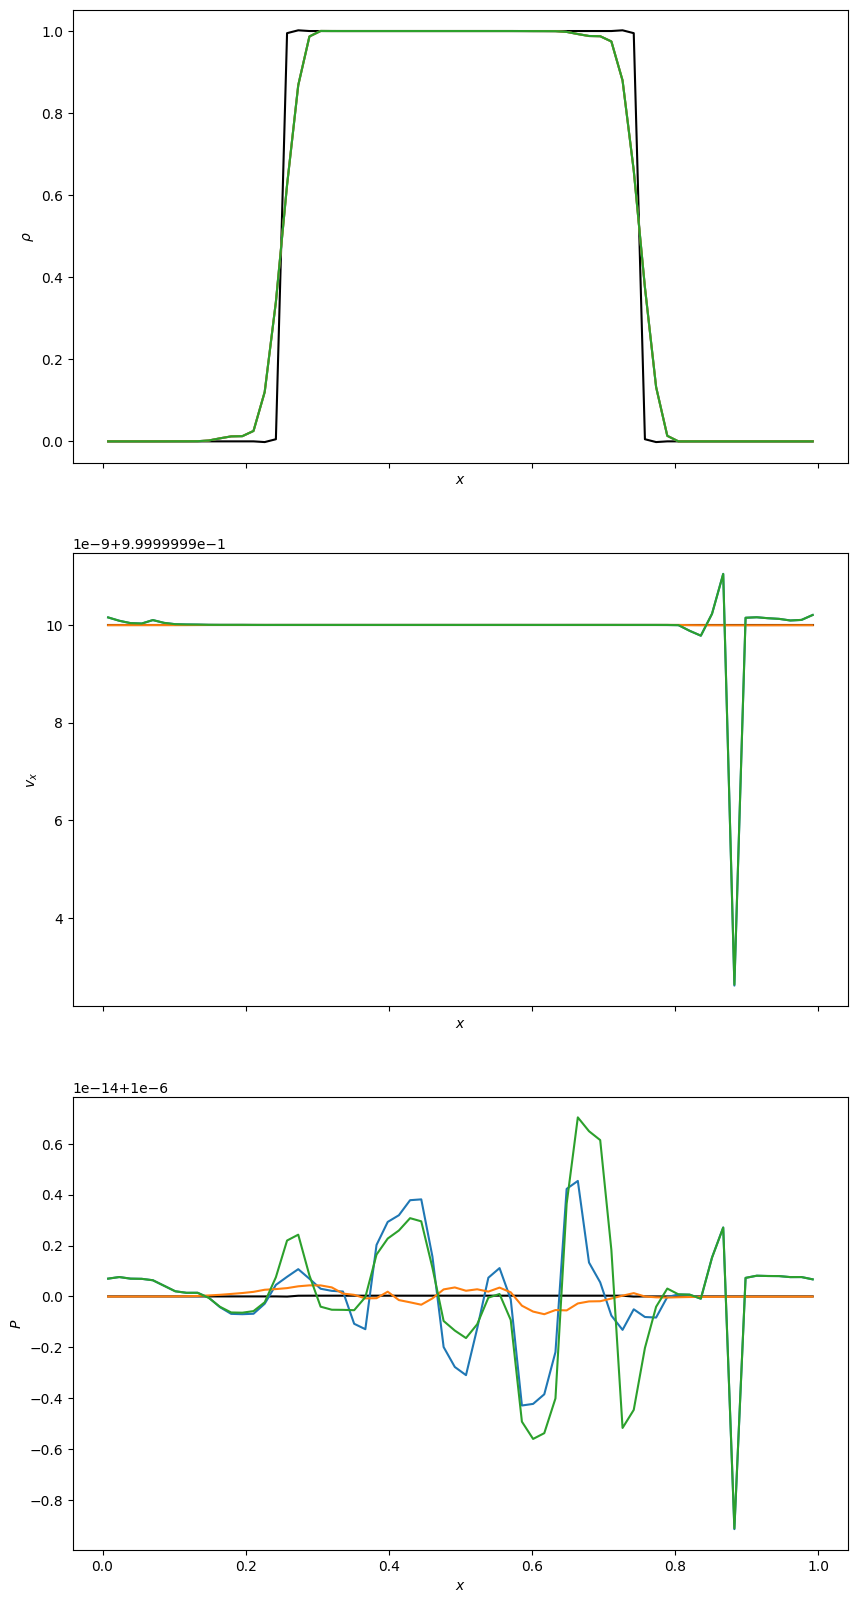

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20), sharex=True)
solver1.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
solver1.plot_1d_slice(axs[0], "rho", array="w", x=None, t=T)
solver2.plot_1d_slice(axs[0], "rho", array="w", x=None, t=T)
solver3.plot_1d_slice(axs[0], "rho", array="w", x=None, t=T)
axs[0].set_ylabel(r"$\rho$")
solver1.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
solver1.plot_1d_slice(axs[1], "vx", array="w", x=None, t=T)
solver2.plot_1d_slice(axs[1], "vx", array="w", x=None, t=T)
solver3.plot_1d_slice(axs[1], "vx", array="w", x=None, t=T)
axs[1].set_ylabel(r"$v_x$")
solver1.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
solver1.plot_1d_slice(axs[2], "P", array="w", x=None, t=T)
solver2.plot_1d_slice(axs[2], "P", array="w", x=None, t=T)
solver3.plot_1d_slice(axs[2], "P", array="w", x=None, t=T)
axs[2].set_ylabel(r"$P$")